<a href="https://colab.research.google.com/github/ABHISHEK-DEY-64150/Machine_learning_projects/blob/main/Analysis_On_Iris_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('Iris.csv')
data.drop(columns=data.columns[0], 
        axis=1, 
        inplace=True)

data


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = data.iloc[:, :-1].values;
y = data.iloc[:,-1].values;

In [ ]:
y


array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

**Task 1**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


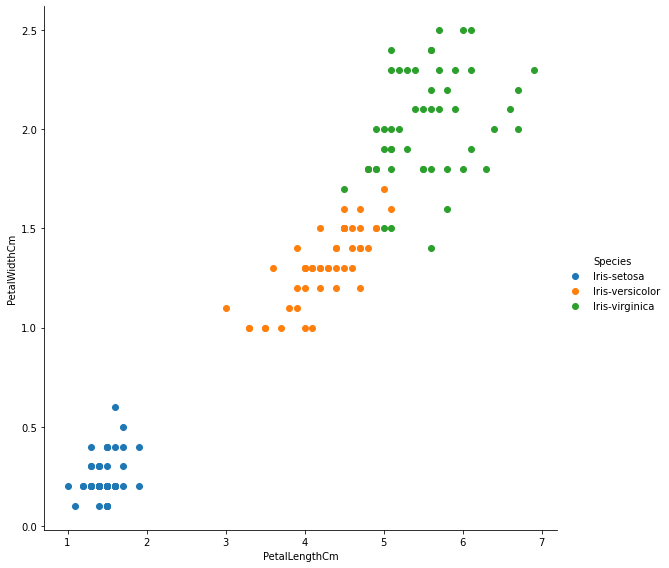

In [ ]:
sns.FacetGrid(data, hue="Species", size=8) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Task-1**

**K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = KNN_classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion matrix for K-NN\n")

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=['Iris-versicolor', 'Iris-virginica','Iris-setosa']), 
)
print(cm)


accuracy_score(y_test, y_pred)

Confusion matrix for K-NN

    0   1   2
0  22   1   0
1   3  18   0
2   0   0  16


0.9333333333333333

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=0, max_depth=5)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [ ]:
y_pred = DT_classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion matrix for Decision Tree\n")

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=['Iris-versicolor', 'Iris-virginica','Iris-setosa']), 
)
print(cm)


accuracy_score(y_test, y_pred)

Confusion matrix for Decision Tree

    0   1   2
0  22   1   0
1   2  19   0
2   0   0  16


0.95

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 5, random_state = 0)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [ ]:
y_pred = RF_classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion matrix for Random Forest\n")

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=['Iris-versicolor', 'Iris-virginica','Iris-setosa']), 
)
print(cm)


accuracy_score(y_test, y_pred)

Confusion matrix for Random Forest

    0   1   2
0  23   0   0
1   3  18   0
2   0   0  16


0.95

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = NB_classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion matrix for Naive Bayes: \n")

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=['Iris-versicolor', 'Iris-virginica','Iris-setosa']), 
)
print(cm)


accuracy_score(y_test, y_pred)

Confusion matrix for Naive Bayes: 

    0   1   2
0  23   0   0
1   4  17   0
2   0   0  16


0.9333333333333333

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = LR_classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion matrix for Logistic Regression: \n")

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=['Iris-versicolor', 'Iris-virginica','Iris-setosa']), 
)
print(cm)


accuracy_score(y_test, y_pred)

Confusion matrix for Logistic Regression: 

    0   1   2
0  23   0   0
1   4  17   0
2   0   0  16


0.9333333333333333

**Multilayer Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier
MLN_classifier = MLPClassifier( learning_rate='adaptive', learning_rate_init=0.005,random_state=1, max_iter=10000)
MLN_classifier.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', learning_rate_init=0.005,
              max_iter=10000, random_state=1)

In [ ]:
y_pred = MLN_classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion matrix for MultiLayer Nural network: \n")

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=['Iris-versicolor', 'Iris-virginica','Iris-setosa']), 
)
print(cm)


accuracy_score(y_test, y_pred)

Confusion matrix for MultiLayer Nural network: 

    0   1   2
0  22   1   0
1   2  19   0
2   0   0  16


0.95

**SVM**

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
SV_classifier = svm.SVC(kernel = 'linear',C = 1)
SV_classifier.fit(X_train, y_train)

y_pred = SV_classifier.predict(X_test)

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=['Iris-versicolor', 'Iris-virginica','Iris-setosa']), 
)


print("Model accuray for SVM")
print(SV_classifier.score(X_test,y_test))

print("Confusion matrix for SVM network: \n")

print(cm)


Model accuray for SVM
0.9333333333333333
Confusion matrix for SVM network: 

    0   1   2
0  22   1   0
1   3  18   0
2   0   0  16


**Task-3**

**SVM-Plot**

([], <a list of 0 Text major ticklabel objects>)

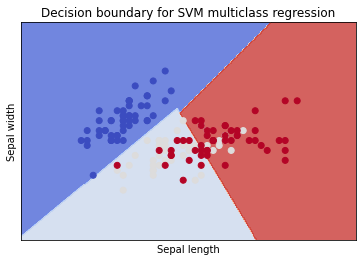

In [ ]:
from sklearn import svm
import numpy as np
import pylab as pl
from sklearn import svm, datasets

iris = datasets.load_iris()

#for SepalLength and SepalWidth


X = iris.data[:, :2]
y = iris.target

h = 0.02
C = 1.0

SV_classifier = svm.SVC(kernel='linear', C=C).fit(X, y)


x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

pl.set_cmap(pl.cm.Paired)

Z = SV_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
pl.set_cmap(pl.cm.Paired)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pl.axis('tight')

plt.title("Decision boundary for SVM multiclass regression")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())





([], <a list of 0 Text major ticklabel objects>)

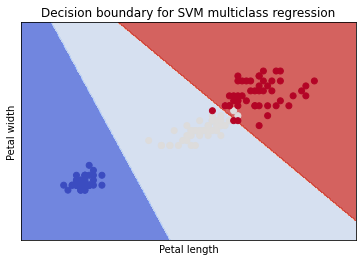

In [ ]:
from sklearn import svm
import numpy as np
import pylab as pl
from sklearn import svm, datasets

iris = datasets.load_iris()

#for PetalLength and PetalWidth


X = iris.data[:, 2:]
y = iris.target

h = 0.02
C = 5

SV_classifier = svm.SVC(kernel='linear', C=C).fit(X, y)


x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

pl.set_cmap(pl.cm.Paired)

Z = SV_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
pl.set_cmap(pl.cm.Paired)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pl.axis('tight')

plt.title("Decision boundary for SVM multiclass regression")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())





**Logistic-Plot**

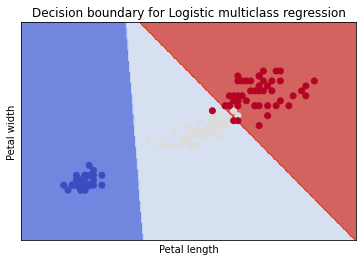

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pylab as pl
from sklearn import svm, datasets
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()

#for PetalLength and PetalWidth


X = iris.data[:, 2:]
y = iris.target

LR = LogisticRegression(multi_class='multinomial', random_state=42, max_iter=500)

LR.fit(X, y)

h = .02


x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

pl.set_cmap(pl.cm.Paired)

Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
pl.set_cmap(pl.cm.Paired)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.title("Decision boundary for Logistic multiclass regression")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()






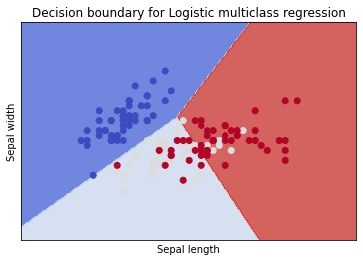

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pylab as pl
from sklearn import svm, datasets
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()

#for SepalLength and SepalWidth


X = iris.data[:, :2]
y = iris.target

LR = LogisticRegression(multi_class='multinomial', random_state=42, max_iter=500)

LR.fit(X, y)

h = .02


x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

pl.set_cmap(pl.cm.Paired)

Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
pl.set_cmap(pl.cm.Paired)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.title("Decision boundary for Logistic multiclass regression")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()






**Task-4**\
**Tuning Hyperparamters**

**SVM-tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#defining parameter range

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ["linear", "poly", "sigmoid","rbf"]}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
grid.fit(X_train, y_train)


print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.944 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.944 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.944 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.944 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.889 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.944 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.944 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.944 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.833 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoi

AxesSubplot(0.125,0.125;0.62x0.755)
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.88      0.96      0.92        23
 Iris-virginica       0.95      0.86      0.90        21

       accuracy                           0.93        60
      macro avg       0.94      0.94      0.94        60
   weighted avg       0.94      0.93      0.93        60



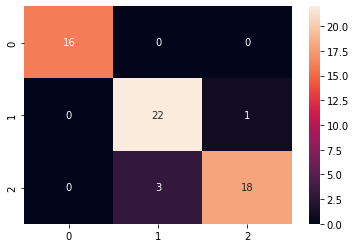

In [ ]:
# Tuning on test data

from sklearn.metrics import classification_report, confusion_matrix 

grid_predictions = grid.predict(X_test)
print(sns.heatmap(confusion_matrix(y_test,grid_predictions),annot=True))
print(classification_report(y_test,grid_predictions))

**KNN-Tuning**

In [ ]:

param_grid = {"n_neighbors": list(range(1, 51)),
              "weights": ["uniform", "distance"],
              "p": [1, 2]
              }        
  
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)


grid.fit(X_train,y_train)       

print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 2/5] END n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/5] END n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5] END n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 5/5] END n_neighbors=1, p=1, weights=uniform;, score=0.944 total time=   0.0s
[CV 1/5] END n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 2/5] END n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5] END n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5] END n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5] END n_neighbors=1, p=1, weights=distance;, score=0.944 total time=   0.0s
[CV 1/5] END n_neighbors=1, p=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 2/5] END n_neighbors=1, p

AxesSubplot(0.125,0.125;0.62x0.755)
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.85      0.96      0.90        23
 Iris-virginica       0.94      0.81      0.87        21

       accuracy                           0.92        60
      macro avg       0.93      0.92      0.92        60
   weighted avg       0.92      0.92      0.92        60



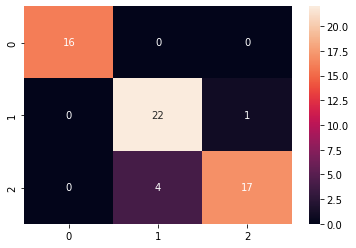

In [ ]:
# tuning on test data

from sklearn.metrics import classification_report, confusion_matrix 

grid_predictions = grid.predict(X_test)
print(sns.heatmap(confusion_matrix(y_test,grid_predictions),annot=True))
print(classification_report(y_test,grid_predictions))

**Random Forest - Tuning**

In [ ]:

param_grid = {
               'max_depth': [None, 2, 5],
               'min_samples_split': [2,5] ,
               'min_samples_leaf': [1, 5] ,
               'max_leaf_nodes': [None, 5, 10]
               }
    
  
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)


grid.fit(X_train,y_train)       

print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=1.000 total time=   0.2s
[CV 2/5] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=1.000 total time=   0.1s
[CV 3/5] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=1.000 total time=   0.2s
[CV 4/5] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=0.889 total time=   0.1s
[CV 5/5] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=0.944 total time=   0.2s
[CV 1/5] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5;, score=1.000 total time=   0.1s
[CV 2/5] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5;, score=1.000 total time=   0.1s
[CV 3/5] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_sam

AxesSubplot(0.125,0.125;0.62x0.755)
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.85      0.96      0.90        23
 Iris-virginica       0.94      0.81      0.87        21

       accuracy                           0.92        60
      macro avg       0.93      0.92      0.92        60
   weighted avg       0.92      0.92      0.92        60



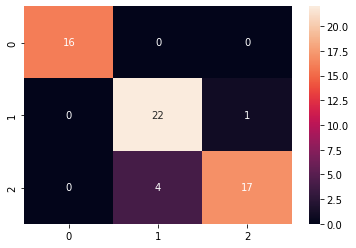

In [ ]:
# tuning on test data

from sklearn.metrics import classification_report, confusion_matrix 

grid_predictions = grid.predict(X_test)
print(sns.heatmap(confusion_matrix(y_test,grid_predictions),annot=True))
print(classification_report(y_test,grid_predictions))

**Task - 5**

**PCA**

In [ ]:
from sklearn.decomposition import PCA

from sklearn import datasets

iris = datasets.load_iris() 

df = pd.DataFrame(iris.data) 

df.columns = iris.feature_names 

df['type'] = iris.target 

print(iris.feature_names)

print(df['type'])

print(iris.target_names)

print(df.head())



['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: type, Length: 150, dtype: int64
['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   type  
0     0  
1     0  
2     0  
3     0  
4     0  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


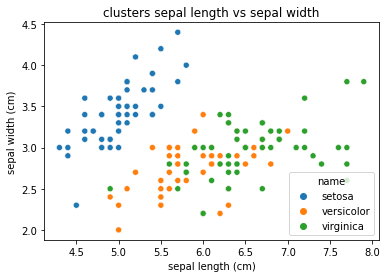

In [ ]:
type_dict = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2]
}

df['name'] = [type_dict[x] for x in df.type]

sns.scatterplot(df['sepal length (cm)'], df['sepal width (cm)'], hue = df['name'])
plt.title('clusters sepal length vs sepal width')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


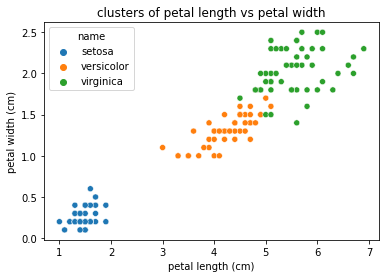

In [ ]:
sns.scatterplot(df['petal length (cm)'], df['petal width (cm)'], hue = df['name'])
plt.title('clusters of petal length vs petal width')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

x = df.drop(['type', 'name'], axis=1).values

df[['petal length (cm)', 'petal width (cm)','sepal length (cm)','sepal width (cm)']]

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6
...,...,...,...,...
145,5.2,2.3,6.7,3.0
146,5.0,1.9,6.3,2.5
147,5.2,2.0,6.5,3.0
148,5.4,2.3,6.2,3.4


In [ ]:
x_scale = StandardScaler().fit_transform(x)

print("Dataset after scaled")
pd.DataFrame(x_scale, columns = iris.feature_names)

Dataset after scaled


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


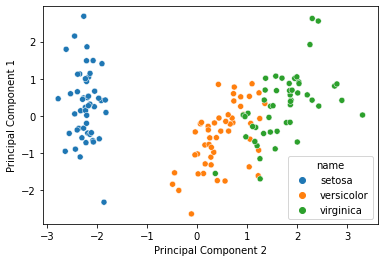

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x_scale)

pca2_df = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

sns.scatterplot(pca2_df.pca1, pca2_df.pca2, hue = df.name)
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


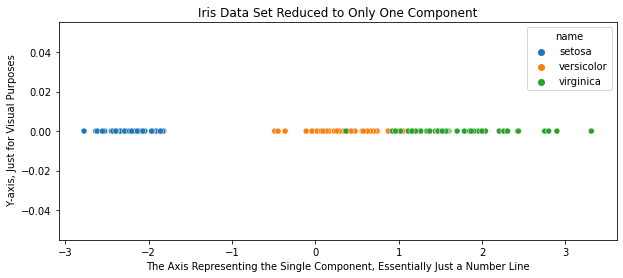

In [ ]:
pcasolo = PCA(n_components = 1)
solopca_vals = pcasolo.fit_transform(x_scale)
zeros = [0 for i in range(150)]

solo_components = []

for i in solopca_vals:
    solo_components.append(i[0])


plt.figure(figsize = (10,4))
sns.scatterplot(solo_components, zeros, hue=df.name)
plt.title('Iris Data Set Reduced to Only One Component')
plt.ylabel(' Y-axis, Just for Visual Purposes')
plt.xlabel('The Axis Representing the Single Component, Essentially Just a Number Line')
plt.show()




In [ ]:
df_solo = pd.DataFrame(data=solo_components, columns=['pca1'])
df_solo['name'] = df.type
pca2_df['name'] = df.type

pca2_df

,pca1,pca2,name
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [ ]:
pca1_X_train, pca1_X_test, pca1_y_train, pca1_y_test = train_test_split(df_solo.drop(['name'], axis=1), df['type'])

pca2_X_train, pca2_X_test, pca2_y_train, pca2_y_test = train_test_split(pca2_df.drop(['name'], axis=1),df['type'])

                                                                     

**KNN**

In [ ]:
# for pca1
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
KNN_classifier.fit(pca1_X_train, pca1_y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
pca1_y_pred = KNN_classifier.predict(pca1_X_test)

print(pca1_y_pred)

[0 1 2 0 1 2 0 0 0 0 2 0 2 1 0 0 0 0 2 2 2 1 0 1 2 1 2 2 2 2 0 1 0 0 0 2 0
 1]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics 
print(metrics.confusion_matrix(pca1_y_pred,pca1_y_test))
print('The accuracy of the KNN is: ', metrics.accuracy_score(pca1_y_pred, pca1_y_test)) 

[[17  0  0]
 [ 0  7  1]
 [ 0  3 10]]
The accuracy of the KNN is:  0.8947368421052632


In [ ]:
#for pca2

KNN_classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
KNN_classifier.fit(pca2_X_train, pca2_y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
pca2_y_pred = KNN_classifier.predict(pca2_X_test)

print(pca2_y_pred)

[2 2 1 0 1 1 2 0 1 1 2 0 0 2 1 1 1 0 0 1 1 1 0 2 0 1 0 0 1 2 0 1 1 2 0 0 1
 0]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics 
print(metrics.confusion_matrix(pca2_y_pred,pca2_y_test))
print('The accuracy of the KNN is: ', metrics.accuracy_score(pca2_y_pred, pca2_y_test)) 

[[14  0  0]
 [ 0 13  3]
 [ 0  1  7]]
The accuracy of the KNN is:  0.8947368421052632


**SVM**

In [ ]:
#for pca1

from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics 

SV_classifier = svm.SVC(kernel = 'linear',C = 1)
SV_classifier.fit(pca1_X_train, pca1_y_train)

pca1_y_pred = SV_classifier.predict(pca1_X_test)


print(metrics.confusion_matrix(pca1_y_pred,pca1_y_test))
print('The accuracy of the SVM is: ', metrics.accuracy_score(pca1_y_pred, pca1_y_test)) 


[[17  0  0]
 [ 0  7  0]
 [ 0  3 11]]
The accuracy of the SVM is:  0.9210526315789473


In [ ]:
#for pca2

SV_classifier = svm.SVC(kernel = 'linear',C = 1)
SV_classifier.fit(pca2_X_train, pca2_y_train)

pca2_y_pred = SV_classifier.predict(pca2_X_test)


print(metrics.confusion_matrix(pca2_y_pred,pca2_y_test))
print('The accuracy of the SVM is: ', metrics.accuracy_score(pca2_y_pred, pca2_y_test)) 



[[14  0  0]
 [ 0 12  2]
 [ 0  2  8]]
The accuracy of the SVM is:  0.8947368421052632


**Logistic Regression**

In [ ]:
#for pca1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics 


LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(pca1_X_train, pca1_y_train)

pca1_y_pred = LR_classifier.predict(pca1_X_test)


print(metrics.confusion_matrix(pca1_y_pred,pca1_y_test))
print('The accuracy of the Logistic regression is: ', metrics.accuracy_score(pca1_y_pred, pca1_y_test)) 

[[17  0  0]
 [ 0  7  0]
 [ 0  3 11]]
The accuracy of the Logistic regression is:  0.9210526315789473


In [ ]:
#for pca2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics 


LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(pca2_X_train, pca2_y_train)

pca2_y_pred = LR_classifier.predict(pca2_X_test)


print(metrics.confusion_matrix(pca2_y_pred,pca2_y_test))
print('The accuracy of the Logistic regression is: ', metrics.accuracy_score(pca2_y_pred, pca2_y_test)) 

[[14  0  0]
 [ 0 12  2]
 [ 0  2  8]]
The accuracy of the Logistic regression is:  0.8947368421052632


**Multilayer Neural Network**

In [ ]:
# for pca1

from sklearn.neural_network import MLPClassifier
MLN_classifier = MLPClassifier( learning_rate='adaptive', learning_rate_init=0.005,random_state=1, max_iter=10000)
MLN_classifier.fit(pca1_X_train, pca1_y_train)


pca1_y_pred = MLN_classifier.predict(pca1_X_test)


print(metrics.confusion_matrix(pca1_y_pred,pca1_y_test))
print('The accuracy of the Multilayer neural network is: ', metrics.accuracy_score(pca1_y_pred, pca1_y_test)) 


[[17  0  0]
 [ 0  7  0]
 [ 0  3 11]]
The accuracy of the Multilayer neural network is:  0.9210526315789473


In [ ]:
# for pca2

MLN_classifier = MLPClassifier( learning_rate='adaptive', learning_rate_init=0.005,random_state=1, max_iter=10000)
MLN_classifier.fit(pca2_X_train, pca2_y_train)

pca2_y_pred = MLN_classifier.predict(pca2_X_test)


print(metrics.confusion_matrix(pca2_y_pred,pca2_y_test))
print('The accuracy of the Multilayer neural network is: ', metrics.accuracy_score(pca2_y_pred, pca2_y_test)) 



[[14  0  0]
 [ 0 12  3]
 [ 0  2  7]]
The accuracy of the Multilayer neural network is:  0.868421052631579


**Naive Bayes**

In [ ]:
# for pca1

from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(pca1_X_train, pca1_y_train)

pca1_y_pred = NB_classifier.predict(pca1_X_test)


print(metrics.confusion_matrix(pca1_y_pred,pca1_y_test))
print('The accuracy of the Naive Bayes is: ', metrics.accuracy_score(pca1_y_pred, pca1_y_test)) 


[[17  0  0]
 [ 0  7  0]
 [ 0  3 11]]
The accuracy of the Naive Bayes is:  0.9210526315789473


In [ ]:
# for pca2

NB_classifier.fit(pca2_X_train, pca2_y_train)

pca2_y_pred = NB_classifier.predict(pca2_X_test)


print(metrics.confusion_matrix(pca2_y_pred,pca2_y_test))
print('The accuracy of the Naive Bayes  is: ', metrics.accuracy_score(pca2_y_pred, pca2_y_test)) 



[[14  0  0]
 [ 0 12  3]
 [ 0  2  7]]
The accuracy of the Naive Bayes  is:  0.868421052631579


**Random Forest**

In [ ]:
# for pca1

from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 5, random_state = 0)
RF_classifier.fit(pca1_X_train, pca1_y_train)


pca1_y_pred = RF_classifier.predict(pca1_X_test)


print(metrics.confusion_matrix(pca1_y_pred,pca1_y_test))
print('The accuracy of the Random Forest is: ', metrics.accuracy_score(pca1_y_pred, pca1_y_test)) 


[[17  0  0]
 [ 0  9  1]
 [ 0  1 10]]
The accuracy of the Random Forest is:  0.9473684210526315


In [ ]:
# for pca2

RF_classifier.fit(pca2_X_train, pca2_y_train)

pca2_y_pred = RF_classifier.predict(pca2_X_test)


print(metrics.confusion_matrix(pca2_y_pred,pca2_y_test))
print('The accuracy of the Random Forest  is: ', metrics.accuracy_score(pca2_y_pred, pca2_y_test)) 



[[14  0  0]
 [ 0 10  2]
 [ 0  4  8]]
The accuracy of the Random Forest  is:  0.8421052631578947


**Decision Tree**

In [ ]:
# for pca1

from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=0, max_depth=5)
DT_classifier.fit(pca1_X_train, pca1_y_train)

pca1_y_pred = DT_classifier.predict(pca1_X_test)


print(metrics.confusion_matrix(pca1_y_pred,pca1_y_test))
print('The accuracy of the Decision Tree is: ', metrics.accuracy_score(pca1_y_pred, pca1_y_test)) 


[[17  0  0]
 [ 0  9  1]
 [ 0  1 10]]
The accuracy of the Decision Tree is:  0.9473684210526315


In [ ]:
# for pca2

DT_classifier.fit(pca2_X_train, pca2_y_train)

pca2_y_pred = DT_classifier.predict(pca2_X_test)


print(metrics.confusion_matrix(pca2_y_pred,pca2_y_test))
print('The accuracy of the Decision Tree  is: ', metrics.accuracy_score(pca2_y_pred, pca2_y_test)) 




[[14  0  0]
 [ 0 11  1]
 [ 0  3  9]]
The accuracy of the Decision Tree  is:  0.8947368421052632
